# Generating Voter Turnout Scores
Anne Bode - Bluebonnet Data Fellow

### 1. Mature Voters
##### Registered for 6+ years prior to election

* **Super Muni Voter** - Voted in prior three off cycle/Muni Elections  
* **Super General/Midterm Voters** - Voted in last two presidential elections + midterm between  
* **Likely Muni Voter** - Voted in at least 1 of prior off cycle/Muni Elections  
* **Likely General/Midterm Voter** - Voted in at least two of past presidental elections + midterm between  
* **Less Likely Voter** - All others 


### 2. Newer Voters
##### Registered for <6 years prior to election
* **Super Muni Young Voter** - Voted in one of past two off cycle/Muni Elections  
* **Super General/Midterm Young Voter** - Voted in last midterm + general  
* **Less Likely Young Voter** - All others  

### 3. VERY New Voters
* **Registered after 2018 Election + voted in 2020**
* **Registered after 2020**

## 1. Prepping the Voter Database

Using our Voter List from VoteBuilder, create a voter database

In [1]:
import pandas as pd
import numpy as np

In [4]:
# import voter universe
df_voters = pd.read_csv('Voter File.csv')
df_voters.head()

,Voter File VANID,mAddress,mCity,mState,mZip5,mZip4,Sex,Address,City,State,...,SpecialPrimary15Party,SpecialPrimary13,SpecialPrimary13Party,SpecialPrimary11,SpecialPrimary11Party,SpecialPrimary09,SpecialPrimary07,SpecialPrimary06,SpecialPrimary05,SpecialPrimary04
0,128792,11 Batchelder St,Boston,MA,2125.0,2630.0,F,11 Batchelder St,Boston,MA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,753948,755 Tremont St Apt 306,Boston,MA,2118.0,1166.0,F,755 Tremont St Apt 306,Boston,MA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1804675,755 Tremont St Apt 509,Boston,MA,2118.0,1169.0,M,755 Tremont St Apt 509,Boston,MA,...,NaN,Y,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2415000,141 Worcester St Apt 3,Boston,MA,2118.0,3452.0,F,141 Worcester St Apt 3,Boston,MA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3196493,32 Greenwich Park Apt 2,Boston,MA,2118.0,3033.0,F,32 Greenwich Park Apt 2,Boston,MA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# make edits to certain columns
df_voters['DateReg'] = pd.to_datetime(df_voters['DateReg'])
df_voters['Ward'] = df_voters['PrecinctName'].str.split(' ').str[1]

df_voters['Ethnicity (Grouped)'] = np.where(df_voters['CodedRaceName'].str.contains('Black'),'Black',
                                        np.where(df_voters['CodedRaceName'].str.contains('Hispanic'),'Hispanic',
                                                np.where(df_voters['CodedRaceName'].str.contains('Asian'),'Asian',
                                                        np.where(df_voters['CodedRaceName'].str.contains('White'),'White',
                                                        'Other'))))

df_voters.head()

,Voter File VANID,mAddress,mCity,mState,mZip5,mZip4,Sex,Address,City,State,...,SpecialPrimary13Party,SpecialPrimary11,SpecialPrimary11Party,SpecialPrimary09,SpecialPrimary07,SpecialPrimary06,SpecialPrimary05,SpecialPrimary04,Ward,Ethnicity (Grouped)
0,128792,11 Batchelder St,Boston,MA,2125.0,2630.0,F,11 Batchelder St,Boston,MA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W08,Black
1,753948,755 Tremont St Apt 306,Boston,MA,2118.0,1166.0,F,755 Tremont St Apt 306,Boston,MA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W04,Hispanic
2,1804675,755 Tremont St Apt 509,Boston,MA,2118.0,1169.0,M,755 Tremont St Apt 509,Boston,MA,...,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W04,Asian
3,2415000,141 Worcester St Apt 3,Boston,MA,2118.0,3452.0,F,141 Worcester St Apt 3,Boston,MA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W04,White
4,3196493,32 Greenwich Park Apt 2,Boston,MA,2118.0,3033.0,F,32 Greenwich Park Apt 2,Boston,MA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W04,Black


## 2. Prep Data for Logistic Regression Model

Create dummy variables out of categorical variables. Trying to predict likelihood they will vote in the 2021 muni election. We will regress 2009, 2013, 2017 vote outcome on applicable voters & features.  

Note: this model will only be helpful for voting behavior of people who have been registered for 6 years before election; will need to run a second model to predict newer voters' behaviors.

In [8]:
# include only the variables we care about for our logistic regression
df_reg = df_voters[['Voter File VANID',
                    'Sex',
                    'Age',
                    'DateReg',
                    'Party',
                    'CodedRaceName',
                    'General20',
                    'General18',
                    'General16',
                    'General14',
                    'General12',
                    'General10',
                    'General08',
                    'General06',
                    'General04',
                    'Municipal19',
                    'Municipal17',
                    'Municipal15',
                    'Municipal13',
                    'Municipal11',
                    'Municipal09',
                    'Municipal07',
                    'Municipal05',
                    'Municipal03'
                    ]].copy(deep=True)

# create dummy variables
df_reg['Woman?'] = np.where(df_reg['Sex']=='F',1,0)

df_reg['AgeMuni17'] = df_reg['Age']-4
df_reg['AgeMuni13'] = df_reg['Age']-8
df_reg['AgeMuni09'] = df_reg['Age']-12

df_reg['Democrat/Green?'] = np.where(df_reg['Party']=='D',1,np.where(df_reg['Party']=='G',1,0))
    
df_reg['Black'] = np.where(df_reg['CodedRaceName'].str.contains('Black'),1,0)
df_reg['Hispanic'] = np.where(df_reg['CodedRaceName'].str.contains('Hispanic'),1,0)
df_reg['Asian'] = np.where(df_reg['CodedRaceName'].str.contains('Asian'),1,0)
df_reg['White'] = np.where(df_reg['CodedRaceName'].str.contains('White'),1,0)

df_reg = df_reg.replace(to_replace=['Y','NaN'],value=[1,0])
df_reg = df_reg.fillna(0)

df_reg.head()

,Voter File VANID,Sex,Age,DateReg,Party,CodedRaceName,General20,General18,General16,General14,...,Municipal03,Woman?,AgeMuni17,AgeMuni13,AgeMuni09,Democrat/Green?,Black,Hispanic,Asian,White
0,128792,F,53,2000-01-14,D,Black (Low),1.0,1.0,1.0,1.0,...,0.0,1,49,45,41,1,1,0,0,0
1,753948,F,71,1988-01-12,D,Hispanic (low),0.0,1.0,1.0,1.0,...,1.0,1,67,63,59,1,0,1,0,0
2,1804675,M,52,1999-09-16,D,Asian (high),1.0,1.0,1.0,1.0,...,0.0,0,48,44,40,1,0,0,1,0
3,2415000,F,65,1996-02-14,D,White (High),1.0,1.0,1.0,1.0,...,1.0,1,61,57,53,1,0,0,0,1
4,3196493,F,62,2000-08-21,D,Black (High),1.0,1.0,1.0,0.0,...,1.0,1,58,54,50,1,1,0,0,0


In [9]:
# create dataframe of just the relevant voters in 2017 muni election (registered for 6 years prior to election) and rename columns
# that way we can create the same dataframe for 2013 and 2009 and merge them to go off of more datapoints

df_reg_2017 = df_reg[['Voter File VANID',
                      'Woman?',
                      'AgeMuni17',
                      'DateReg',
                      'Democrat/Green?',
                      'Black',
                      'Hispanic',
                      'Asian',
                      'White',
                      'General16',
                      'General14',
                      'General12',
                      'Municipal17',
                      'Municipal15',
                      'Municipal13',
                      'Municipal11'
                     ]].copy()

df_reg_2017 = df_reg_2017[df_reg_2017['DateReg']<='2011/11/08']
df_reg_2017.reset_index(inplace=True,drop=True)
df_reg_2017['Year'] = '2017'

df_reg_2017.rename(columns={'AgeMuni17':'AgeMuni',
                            'General16':'General',
                            'General14':'Midterm',
                            'General12':'General-1',
                            'Municipal17':'MuniRace',
                            'Municipal15':'MuniRace-1',
                            'Municipal13':'MuniRace-2',
                            'Municipal11':'MuniRace-3'},inplace=True)

df_reg_2017['AgeInt'] = df_reg_2017['AgeMuni'] // 10

df_reg_2017['20s'] = np.where(df_reg_2017['AgeInt']==2,1,0)
df_reg_2017['30s'] = np.where(df_reg_2017['AgeInt']==3,1,0)
df_reg_2017['40s'] = np.where(df_reg_2017['AgeInt']==4,1,0)
df_reg_2017['50s'] = np.where(df_reg_2017['AgeInt']==5,1,0)
df_reg_2017['60s'] = np.where(df_reg_2017['AgeInt']==6,1,0)
df_reg_2017['70s'] = np.where(df_reg_2017['AgeInt']==7,1,0)
df_reg_2017['80s'] = np.where(df_reg_2017['AgeInt']==8,1,0)

df_reg_2017['Gen Record'] = df_reg_2017['General'] + df_reg_2017['Midterm'] + df_reg_2017['General-1']
df_reg_2017['Super Gen Voter'] = np.where(df_reg_2017['Gen Record']==3,1,0)
df_reg_2017['Likely Gen Voter'] = np.where(df_reg_2017['Gen Record']==2,1,0)

df_reg_2017['Muni Record'] = df_reg_2017['MuniRace-1'] + df_reg_2017['MuniRace-2'] + df_reg_2017['MuniRace-3']
df_reg_2017['Super Muni Voter'] = np.where(df_reg_2017['Muni Record']==3,1,0)
df_reg_2017['Likely Muni Voter'] = np.where(df_reg_2017['Muni Record']==0,0,
                                           np.where(df_reg_2017['Muni Record']<3,1,0))

df_reg_2017.head()

,Voter File VANID,Woman?,AgeMuni,DateReg,Democrat/Green?,Black,Hispanic,Asian,White,General,...,50s,60s,70s,80s,Gen Record,Super Gen Voter,Likely Gen Voter,Muni Record,Super Muni Voter,Likely Muni Voter
0,128792,1,49,2000-01-14,1,1,0,0,0,1.0,...,0,0,0,0,3.0,1,0,0.0,0,0
1,753948,1,67,1988-01-12,1,0,1,0,0,1.0,...,0,1,0,0,2.0,0,1,2.0,0,1
2,1804675,0,48,1999-09-16,1,0,0,1,0,1.0,...,0,0,0,0,3.0,1,0,2.0,0,1
3,2415000,1,61,1996-02-14,1,0,0,0,1,1.0,...,0,1,0,0,3.0,1,0,0.0,0,0
4,3196493,1,58,2000-08-21,1,1,0,0,0,1.0,...,1,0,0,0,1.0,0,0,0.0,0,0


In [10]:
# create dataframe of just the relevant voters in 2013 muni election (registered for 6 years prior to election) and rename columns

df_reg_2013 = df_reg[['Voter File VANID',
                      'Woman?',
                      'AgeMuni13',
                      'DateReg',
                      'Democrat/Green?',
                      'Black',
                      'Hispanic',
                      'Asian',
                      'White',
                      'General12',
                      'General10',
                      'General08',
                      'Municipal13',
                      'Municipal11',
                      'Municipal09',
                      'Municipal07'
                     ]].copy()

df_reg_2013 = df_reg_2013[df_reg_2013['DateReg']<='2007/11/06']
df_reg_2013.reset_index(inplace=True,drop=True)
df_reg_2013['Year'] = '2013'

df_reg_2013.rename(columns={'AgeMuni13':'AgeMuni',
                            'General12':'General',
                            'General10':'Midterm',
                            'General08':'General-1',
                            'Municipal13':'MuniRace',
                            'Municipal11':'MuniRace-1',
                            'Municipal09':'MuniRace-2',
                            'Municipal07':'MuniRace-3'},inplace=True)

df_reg_2013['AgeInt'] = df_reg_2013['AgeMuni'] // 10

df_reg_2013['20s'] = np.where(df_reg_2013['AgeInt']==2,1,0)
df_reg_2013['30s'] = np.where(df_reg_2013['AgeInt']==3,1,0)
df_reg_2013['40s'] = np.where(df_reg_2013['AgeInt']==4,1,0)
df_reg_2013['50s'] = np.where(df_reg_2013['AgeInt']==5,1,0)
df_reg_2013['60s'] = np.where(df_reg_2013['AgeInt']==6,1,0)
df_reg_2013['70s'] = np.where(df_reg_2013['AgeInt']==7,1,0)
df_reg_2013['80s'] = np.where(df_reg_2013['AgeInt']==8,1,0)

df_reg_2013['Gen Record'] = df_reg_2013['General'] + df_reg_2013['Midterm'] + df_reg_2013['General-1']
df_reg_2013['Super Gen Voter'] = np.where(df_reg_2013['Gen Record']==3,1,0)
df_reg_2013['Likely Gen Voter'] = np.where(df_reg_2013['Gen Record']==2,1,0)

df_reg_2013['Muni Record'] = df_reg_2013['MuniRace-1'] + df_reg_2013['MuniRace-2'] + df_reg_2013['MuniRace-3']
df_reg_2013['Super Muni Voter'] = np.where(df_reg_2013['Muni Record']==3,1,0)
df_reg_2013['Likely Muni Voter'] = np.where(df_reg_2013['Muni Record']==0,0,
                                           np.where(df_reg_2013['Muni Record']<3,1,0))

df_reg_2013.head()

,Voter File VANID,Woman?,AgeMuni,DateReg,Democrat/Green?,Black,Hispanic,Asian,White,General,...,50s,60s,70s,80s,Gen Record,Super Gen Voter,Likely Gen Voter,Muni Record,Super Muni Voter,Likely Muni Voter
0,128792,1,45,2000-01-14,1,1,0,0,0,1.0,...,0,0,0,0,3.0,1,0,1.0,0,1
1,753948,1,63,1988-01-12,1,0,1,0,0,0.0,...,0,1,0,0,0.0,0,0,3.0,1,0
2,1804675,0,44,1999-09-16,1,0,0,1,0,1.0,...,0,0,0,0,2.0,0,1,1.0,0,1
3,2415000,1,57,1996-02-14,1,0,0,0,1,1.0,...,1,0,0,0,3.0,1,0,0.0,0,0
4,3196493,1,54,2000-08-21,1,1,0,0,0,0.0,...,1,0,0,0,2.0,0,1,0.0,0,0


In [11]:
# create dataframe of just the relevant voters in 2009 muni election (registered for 6 years prior to election) and rename columns

df_reg_2009 = df_reg[['Voter File VANID',
                      'Woman?',
                      'AgeMuni09',
                      'DateReg',
                      'Democrat/Green?',
                      'Black',
                      'Hispanic',
                      'Asian',
                      'White',
                      'General08',
                      'General06',
                      'General04',
                      'Municipal09',
                      'Municipal07',
                      'Municipal05',
                      'Municipal03'
                     ]].copy()

df_reg_2009 = df_reg_2009[df_reg_2009['DateReg']<='2003/11/04']
df_reg_2009.reset_index(inplace=True,drop=True)
df_reg_2009['Year'] = '2009'

df_reg_2009.rename(columns={'AgeMuni09':'AgeMuni',
                            'General08':'General',
                            'General06':'Midterm',
                            'General04':'General-1',
                            'Municipal09':'MuniRace',
                            'Municipal07':'MuniRace-1',
                            'Municipal05':'MuniRace-2',
                            'Municipal03':'MuniRace-3'},inplace=True)

df_reg_2009['AgeInt'] = df_reg_2009['AgeMuni'] // 10

df_reg_2009['20s'] = np.where(df_reg_2009['AgeInt']==2,1,0)
df_reg_2009['30s'] = np.where(df_reg_2009['AgeInt']==3,1,0)
df_reg_2009['40s'] = np.where(df_reg_2009['AgeInt']==4,1,0)
df_reg_2009['50s'] = np.where(df_reg_2009['AgeInt']==5,1,0)
df_reg_2009['60s'] = np.where(df_reg_2009['AgeInt']==6,1,0)
df_reg_2009['70s'] = np.where(df_reg_2009['AgeInt']==7,1,0)
df_reg_2009['80s'] = np.where(df_reg_2009['AgeInt']==8,1,0)

df_reg_2009['Gen Record'] = df_reg_2009['General'] + df_reg_2009['Midterm'] + df_reg_2009['General-1']
df_reg_2009['Super Gen Voter'] = np.where(df_reg_2009['Gen Record']==3,1,0)
df_reg_2009['Likely Gen Voter'] = np.where(df_reg_2009['Gen Record']==2,1,0)

df_reg_2009['Muni Record'] = df_reg_2009['MuniRace-1'] + df_reg_2009['MuniRace-2'] + df_reg_2009['MuniRace-3']
df_reg_2009['Super Muni Voter'] = np.where(df_reg_2009['Muni Record']==3,1,0)
df_reg_2009['Likely Muni Voter'] = np.where(df_reg_2009['Muni Record']==0,0,
                                           np.where(df_reg_2009['Muni Record']<3,1,0))

df_reg_2009.head()

,Voter File VANID,Woman?,AgeMuni,DateReg,Democrat/Green?,Black,Hispanic,Asian,White,General,...,50s,60s,70s,80s,Gen Record,Super Gen Voter,Likely Gen Voter,Muni Record,Super Muni Voter,Likely Muni Voter
0,128792,1,41,2000-01-14,1,1,0,0,0,1.0,...,0,0,0,0,3.0,1,0,0.0,0,0
1,753948,1,59,1988-01-12,1,0,1,0,0,0.0,...,1,0,0,0,1.0,0,0,2.0,0,1
2,1804675,0,40,1999-09-16,1,0,0,1,0,0.0,...,0,0,0,0,0.0,0,0,0.0,0,0
3,2415000,1,53,1996-02-14,1,0,0,0,1,1.0,...,1,0,0,0,3.0,1,0,1.0,0,1
4,3196493,1,50,2000-08-21,1,1,0,0,0,1.0,...,1,0,0,0,3.0,1,0,2.0,0,1


In [12]:
# merge data frames

df_reg_final = df_reg_2017.append(df_reg_2013, ignore_index=True)
df_reg_final = df_reg_final.append(df_reg_2009, ignore_index=True)
df_reg_final.head()

,Voter File VANID,Woman?,AgeMuni,DateReg,Democrat/Green?,Black,Hispanic,Asian,White,General,...,50s,60s,70s,80s,Gen Record,Super Gen Voter,Likely Gen Voter,Muni Record,Super Muni Voter,Likely Muni Voter
0,128792,1,49,2000-01-14,1,1,0,0,0,1.0,...,0,0,0,0,3.0,1,0,0.0,0,0
1,753948,1,67,1988-01-12,1,0,1,0,0,1.0,...,0,1,0,0,2.0,0,1,2.0,0,1
2,1804675,0,48,1999-09-16,1,0,0,1,0,1.0,...,0,0,0,0,3.0,1,0,2.0,0,1
3,2415000,1,61,1996-02-14,1,0,0,0,1,1.0,...,0,1,0,0,3.0,1,0,0.0,0,0
4,3196493,1,58,2000-08-21,1,1,0,0,0,1.0,...,1,0,0,0,1.0,0,0,0.0,0,0


In [13]:
# create dataframe of just the relevant voters in 2021 muni election (registered for 6 years prior to election) and rename columns

df_reg_2021 = df_reg[['Voter File VANID',
                      'Woman?',
                      'Age',
                      'DateReg',
                      'Democrat/Green?',
                      'Black',
                      'Hispanic',
                      'Asian',
                      'White',
                      'General20', #gen
                      'General18', #mid
                      'General16', #gen-1
                      'Municipal19', #muni-1
                      'Municipal17', #muni-2 (MAYORAL)
                      'Municipal15' #muni-3
                     ]].copy()

df_reg_2021 = df_reg_2021[df_reg_2021['DateReg']<='2015/11/03']
df_reg_2021.reset_index(inplace=True,drop=True)
df_reg_2021['Year'] = '2021'

df_reg_2021.rename(columns={'Age':'AgeMuni',
                            'General20':'General',
                            'General18':'Midterm',
                            'General16':'General-1',
                            'Municipal19':'MuniRace-1',
                            'Municipal17':'MuniRace-2',
                            'Municipal15':'MuniRace-3'},inplace=True)

df_reg_2021['AgeInt'] = df_reg_2021['AgeMuni'] // 10

df_reg_2021['20s'] = np.where(df_reg_2021['AgeInt']==2,1,0)
df_reg_2021['30s'] = np.where(df_reg_2021['AgeInt']==3,1,0)
df_reg_2021['40s'] = np.where(df_reg_2021['AgeInt']==4,1,0)
df_reg_2021['50s'] = np.where(df_reg_2021['AgeInt']==5,1,0)
df_reg_2021['60s'] = np.where(df_reg_2021['AgeInt']==6,1,0)
df_reg_2021['70s'] = np.where(df_reg_2021['AgeInt']==7,1,0)
df_reg_2021['80s'] = np.where(df_reg_2021['AgeInt']==8,1,0)

df_reg_2021['Gen Record'] = df_reg_2021['General'] + df_reg_2021['Midterm'] + df_reg_2021['General-1']
df_reg_2021['Super Gen Voter'] = np.where(df_reg_2021['Gen Record']==3,1,0)
df_reg_2021['Likely Gen Voter'] = np.where(df_reg_2021['Gen Record']==2,1,0)

df_reg_2021['Muni Record'] = df_reg_2021['MuniRace-1'] + df_reg_2021['MuniRace-2'] + df_reg_2021['MuniRace-3']
df_reg_2021['Super Muni Voter'] = np.where(df_reg_2021['Muni Record']==3,1,0)
df_reg_2021['Likely Muni Voter'] = np.where(df_reg_2021['Muni Record']==0,0,np.where(df_reg_2021['Muni Record']<3,1,0))
    
df_reg_2021.head()

,Voter File VANID,Woman?,AgeMuni,DateReg,Democrat/Green?,Black,Hispanic,Asian,White,General,...,50s,60s,70s,80s,Gen Record,Super Gen Voter,Likely Gen Voter,Muni Record,Super Muni Voter,Likely Muni Voter
0,128792,1,53,2000-01-14,1,1,0,0,0,1.0,...,1,0,0,0,3.0,1,0,0.0,0,0
1,753948,1,71,1988-01-12,1,0,1,0,0,0.0,...,0,0,1,0,2.0,0,1,2.0,0,1
2,1804675,0,52,1999-09-16,1,0,0,1,0,1.0,...,1,0,0,0,3.0,1,0,0.0,0,0
3,2415000,1,65,1996-02-14,1,0,0,0,1,1.0,...,0,1,0,0,3.0,1,0,2.0,0,1
4,3196493,1,62,2000-08-21,1,1,0,0,0,1.0,...,0,1,0,0,3.0,1,0,0.0,0,0


## 3. Create Logistic Regression Model

In [16]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [17]:
y = df_reg_final['MuniRace']
x = df_reg_final[['Voter File VANID',
                  #'Woman?',
                  #'Democrat/Green?',
                  #'Black',
                  #'Hispanic',
                  #'Asian',
                  #'White',
                  '20s',
                  '30s',
                  '40s',
                  '50s',
                  '60s',
                  '70s',
                  '80s',
                  'Super Gen Voter',
                  'Likely Gen Voter',
                  'Super Muni Voter',
                  'Likely Muni Voter'
                 ]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [18]:
logit_model = sm.Logit(y_train,x_train.drop(columns=['Voter File VANID'])).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.494263
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               MuniRace   No. Observations:                22960
Model:                          Logit   Df Residuals:                    22949
Method:                           MLE   Df Model:                           10
Date:                Fri, 05 Nov 2021   Pseudo R-squ.:                  0.2824
Time:                        20:08:23   Log-Likelihood:                -11348.
converged:                       True   LL-Null:                       -15814.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
20s                  -2.7156      0.068    -40.136      0.000      -2.848      -2.583
30s     

In [19]:
yhat = logit_model.predict(x_test.drop(columns=['Voter File VANID']))
prediction = list(map(round, yhat))

Confusion Matrix : 
 [[3421  771]
 [ 892 2570]]


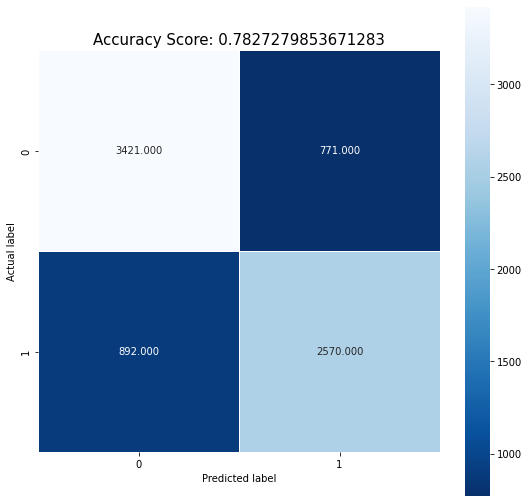

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
  
# confusion matrix
cm = confusion_matrix(y_test, prediction) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
score = accuracy_score(y_test, prediction)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## 4. Use Logistic Regression to Assign Turnout Scores for 2021 Election

In [22]:
x_2021 = df_reg_2021[[#'Woman?',
                      #'Democrat/Green?',
                      #'Black',
                      #'Hispanic',
                      #'Asian',
                      #'White',
                      '20s',
                      '30s',
                      '40s',
                      '50s',
                      '60s',
                      '70s',
                      '80s',
                      'Super Gen Voter',
                      'Likely Gen Voter',
                      'Super Muni Voter',
                      'Likely Muni Voter'
                    ]]

yhat_2021 = logit_model.predict(x_2021)
df_reg_2021['TurnoutScore'] = yhat_2021
df_reg_2021.head()

,Voter File VANID,Woman?,AgeMuni,DateReg,Democrat/Green?,Black,Hispanic,Asian,White,General,...,60s,70s,80s,Gen Record,Super Gen Voter,Likely Gen Voter,Muni Record,Super Muni Voter,Likely Muni Voter,TurnoutScore
0,128792,1,53,2000-01-14,1,1,0,0,0,1.0,...,0,0,0,3.0,1,0,0.0,0,0,0.436416
1,753948,1,71,1988-01-12,1,0,1,0,0,0.0,...,0,1,0,2.0,0,1,2.0,0,1,0.517178
2,1804675,0,52,1999-09-16,1,0,0,1,0,1.0,...,0,0,0,3.0,1,0,0.0,0,0,0.436416
3,2415000,1,65,1996-02-14,1,0,0,0,1,1.0,...,1,0,0,3.0,1,0,2.0,0,1,0.745715
4,3196493,1,62,2000-08-21,1,1,0,0,0,1.0,...,1,0,0,3.0,1,0,0.0,0,0,0.469079


In [23]:
df_final = pd.merge(df_voters, df_reg_2021[['Voter File VANID','TurnoutScore']],on='Voter File VANID',how='left')
df_final.head()

,Voter File VANID,mAddress,mCity,mState,mZip5,mZip4,Sex,Address,City,State,...,SpecialPrimary11,SpecialPrimary11Party,SpecialPrimary09,SpecialPrimary07,SpecialPrimary06,SpecialPrimary05,SpecialPrimary04,Ward,Ethnicity (Grouped),TurnoutScore
0,128792,11 Batchelder St,Boston,MA,2125.0,2630.0,F,11 Batchelder St,Boston,MA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W08,Black,0.436416
1,753948,755 Tremont St Apt 306,Boston,MA,2118.0,1166.0,F,755 Tremont St Apt 306,Boston,MA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W04,Hispanic,0.517178
2,1804675,755 Tremont St Apt 509,Boston,MA,2118.0,1169.0,M,755 Tremont St Apt 509,Boston,MA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W04,Asian,0.436416
3,2415000,141 Worcester St Apt 3,Boston,MA,2118.0,3452.0,F,141 Worcester St Apt 3,Boston,MA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W04,White,0.745715
4,3196493,32 Greenwich Park Apt 2,Boston,MA,2118.0,3033.0,F,32 Greenwich Park Apt 2,Boston,MA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W04,Black,0.469079


## 5. Visualize Likely Voter Stats

In [24]:
turnout_threshold = 0.75
df_likely_voters = df_final[df_final['TurnoutScore']>=0.75]
df_likely_voters.head()

,Voter File VANID,mAddress,mCity,mState,mZip5,mZip4,Sex,Address,City,State,...,SpecialPrimary11,SpecialPrimary11Party,SpecialPrimary09,SpecialPrimary07,SpecialPrimary06,SpecialPrimary05,SpecialPrimary04,Ward,Ethnicity (Grouped),TurnoutScore
5,3198397,24 Greenwich Park # 1,Boston,MA,2118.0,3004.0,M,24 Greenwich Park # 1,Boston,MA,...,NaN,NaN,D,NaN,NaN,NaN,NaN,W04,White,0.919506
6,3210197,12 Rutland Sq # 3,Boston,MA,2118.0,3106.0,F,12 Rutland Sq # 3,Boston,MA,...,NaN,NaN,D,NaN,NaN,NaN,NaN,W04,White,0.924308
19,2637989,1850 Washington St Apt 408,Boston,MA,2118.0,1714.0,M,1850 Washington St Apt 408,Boston,MA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W08,Black,0.900076
27,2644564,353 Massachusetts Ave Apt B1,Boston,MA,2115.0,4936.0,M,353 Massachusetts Ave Apt B1,Boston,MA,...,NaN,NaN,D,NaN,NaN,NaN,NaN,W04,Hispanic,0.900076
29,2661757,333 Massachusetts Ave Apt 1209,Boston,MA,2115.0,2226.0,F,333 Massachusetts Ave Apt 1209,Boston,MA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W04,White,0.861931


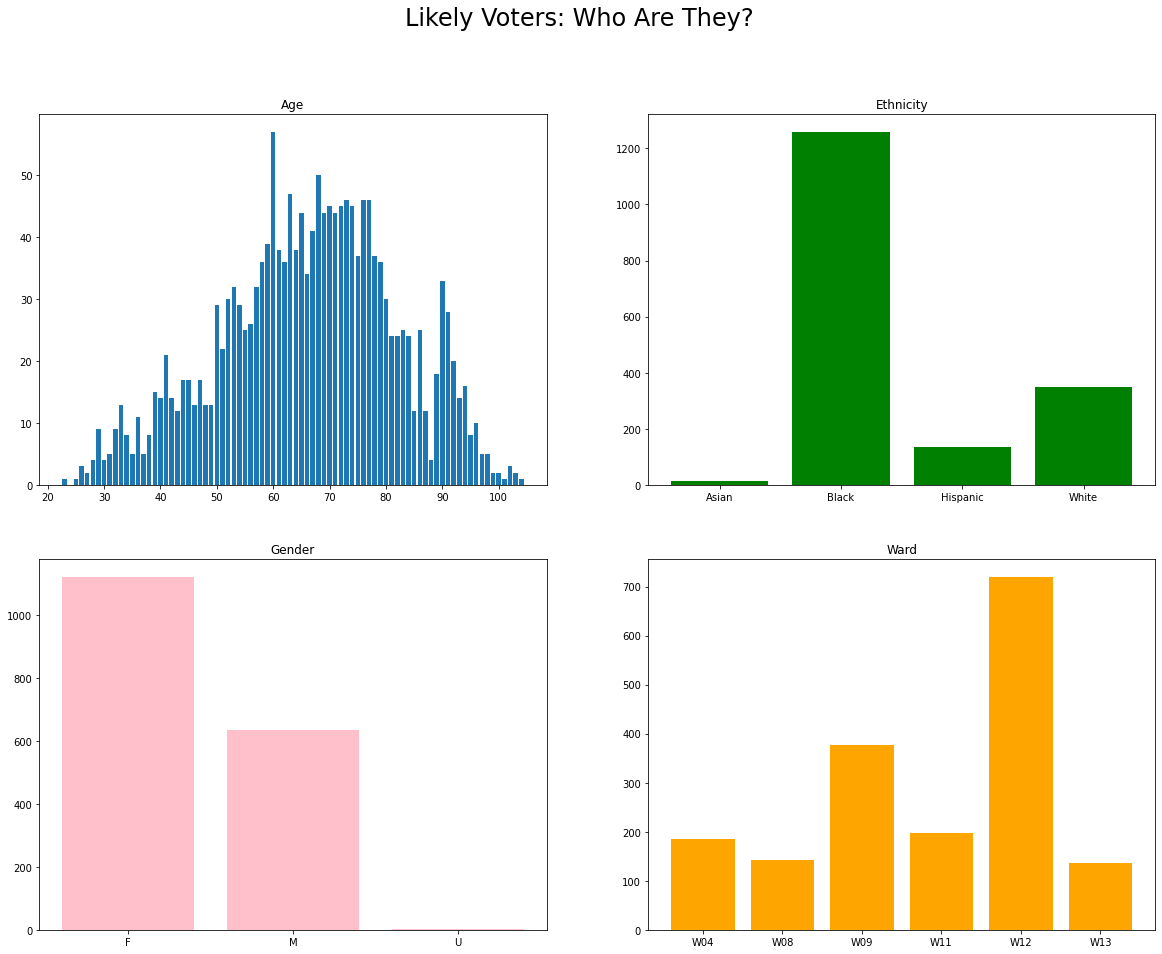

In [25]:
fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(20,15))
fig.suptitle('Likely Voters: Who Are They?',size=24)

axs = axs.ravel()

labels, counts = np.unique(df_likely_voters['Age'], return_counts=True)
axs[0].bar(labels, counts, align='center')
axs[0].set_title('Age')

labels, counts = np.unique(df_likely_voters['Ethnicity (Grouped)'], return_counts=True)
axs[1].bar(labels, counts, align='center',color='green')
axs[1].set_title('Ethnicity')

labels, counts = np.unique(df_likely_voters['Sex'], return_counts=True)
axs[2].bar(labels, counts, align='center',color='pink')
axs[2].set_title('Gender')

labels, counts = np.unique(df_likely_voters['Ward'], return_counts=True)
axs[3].bar(labels, counts, align='center',color='orange')
axs[3].set_title('Ward')

plt.show()